In [47]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('resources/day_length_weight.csv', dtype='float')
train_y = train.pop('# day')
train_x = torch.tensor(train.to_numpy(), dtype=torch.float).reshape(-1,2)
train_y = torch.tensor(train_y.to_numpy(), dtype=torch.float).reshape(-1,1)

In [48]:
class LinearRegressionModel:
    def __init__(self):
        self.W = torch.rand((2,1), requires_grad=True)
        self.b = torch.rand((1,1), requires_grad=True)

    def f(self, x):
        return x @ self.W + self.b

    def loss(self, x, y):
        x = torch.nn.functional.mse_loss(self.f(x), y)
        return x

In [49]:
model = LinearRegressionModel()
optimizer = torch.optim.SGD([model.b, model.W], lr=0.000115)
for epoch in range(80000):
    model.loss(train_x, train_y).backward() 
    optimizer.step() 
    optimizer.zero_grad()  
    if epoch % 10000 == 0:
            loss, current = model.loss(train_x, train_y).item(), epoch * len(train_x)
            print(f"loss: {loss:>7f}")

print("W = %s, b = %s, loss = %s" %(model.W, model.b, model.loss(train_x, train_y)))

loss: 868408.687500
loss: 85386.367188
loss: 80200.562500
loss: 75448.710938
loss: 71094.546875
loss: 67104.882812
loss: 63448.898438
loss: 60098.992188
W = tensor([[ 5.4774],
        [78.4948]], requires_grad=True), b = tensor([[-558.9046]], requires_grad=True), loss = tensor(57030.5195, grad_fn=<MseLossBackward0>)


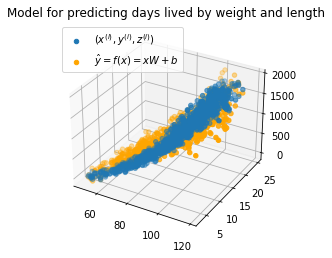

In [50]:
xt =train_x.t()[0]
yt =train_x.t()[1]
fig = plt.figure('Linear regression 3d')
ax = fig.add_subplot(projection='3d', title="Model for predicting days lived by weight and length")
# Plot
ax.scatter(xt.numpy(),  yt.numpy(), train_y.numpy(), label='$(x^{(i)},y^{(i)}, z^{(i)})$')
ax.scatter(xt.numpy(),yt.numpy() ,model.f(train_x).detach().numpy(), label='$\\hat y = f(x) = xW+b$', color="orange")
ax.legend()
plt.show()